In [7]:
# Description 

# to explore, segment, and cluster the neighborhoods in the city of Toronto. 

<h1> Segmentation and Clustering of the city of Toronto Neighborhoods

In [8]:
# needed Librairies: 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

<h3> 1.Importing data from the wikipedia website for the city of Toronto neighborhoods 

In [71]:
import requests 
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [72]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
#print(soup.prettify())

<h3> 2. Extracting a table from the Wikipedia website using the soup tools 

In [73]:
my_table = soup.find('table',{'class':'wikitable sortable'})


In this step, we scan through the table created above in order to eliminate the HTML marker and distill the information of the postal codes, boroughs and neighborhoods

In [76]:



    # preinit list of lists
    rows = my_table.findAll('tr')
    row_lengths = [len(r.findAll(['th', 'td'])) for r in rows]
    ncols = max(row_lengths)
    nrows = len(rows)
    data = []
    for i in range(nrows):
        rowD = []
        for j in range(ncols):
            rowD.append('')
        data.append(rowD)

    # process html
    for i in range(len(rows)):
        row = rows[i]
        rowD = []
        cells = row.findAll(["td", "th"])
        for j in range(len(cells)):
            cell = cells[j]

            #lots of cells span cols and rows so lets deal with that
            cspan = int(cell.get('colspan', 1))
            rspan = int(cell.get('rowspan', 1))
            l = 0
            for k in range(rspan):
                # Shifts to the first empty cell of this row
                while data[i + k][j + l]:
                    l += 1
                for m in range(cspan):
                    cell_n = j + l + m
                    row_n = i + k
                    # in some cases the colspan can overflow the table, in those cases just get the last item
                    cell_n = min(cell_n, len(data[row_n])-1)
                    data[row_n][cell_n] += cell.text
                    print(cell.text)

        data.append(rowD)

# write data out to tab seperated format
    page = os.path.split(website_url)[1]
    fname = 'output_{}_t{}.tsv'.format(page, tn)
    f = codecs.open(fname, 'w')
    for i in range(nrows):
        rowStr = '\t'.join(data[i])
        rowStr = rowStr.replace('\n', '')
        print(rowStr)
        f.write(rowStr + '\n')

    f.close()

Postal code

Borough

Neighborhood

M1A

Not assigned



M2A

Not assigned



M3A

North York

Parkwoods

M4A

North York

Victoria Village

M5A

Downtown Toronto

Regent Park / Harbourfront

M6A

North York

Lawrence Manor / Lawrence Heights

M7A

Downtown Toronto

Queen's Park / Ontario Provincial Government

M8A

Not assigned



M9A

Etobicoke

Islington Avenue

M1B

Scarborough

Malvern / Rouge

M2B

Not assigned



M3B

North York

Don Mills

M4B

East York

Parkview Hill / Woodbine Gardens

M5B

Downtown Toronto

Garden District, Ryerson

M6B

North York

Glencairn

M7B

Not assigned



M8B

Not assigned



M9B

Etobicoke

West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale

M1C

Scarborough

Rouge Hill / Port Union / Highland Creek

M2C

Not assigned



M3C

North York

Don Mills

M4C

East York

Woodbine Heights

M5C

Downtown Toronto

St. James Town

M6C

York

Humewood-Cedarvale

M7C

Not assigned



M8C

Not assigned



M9C

Etobicoke

Eringate / Bloor

NameError: name 'os' is not defined

<h3> 3. Converting the table into a workable DataFrame using Pandas 

In [56]:
# define the dataframe columns
df=pd.DataFrame(data)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header


                 

df['Postal code'] = df['Postal code\n'].str.replace(r'\b\n$', '', regex=True).str.strip()
df['Borough'] = df['Borough\n'].str.replace(r'\b\n$', '', regex=True).str.strip()
df['Neighborhood'] = df['Neighborhood\n'].str.replace(r'\b\n$', '', regex=True).str.strip()
df.drop(['Postal code\n', 'Borough\n','Neighborhood\n'], inplace = True, axis=1)
df.columns
# Drop rows with any empty cells
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace= True)
df

,Postal code,Borough,Neighborhood
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Regent Park / Harbourfront
6,M6A,North York,Lawrence Manor / Lawrence Heights
7,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
8,M8A,Not assigned,
9,M9A,Etobicoke,Islington Avenue
10,M1B,Scarborough,Malvern / Rouge


In [57]:
#making sure that all the postal codes that do not have a corresponding borough are dropped
df = df[df['Borough'] != 'Not assigned']
df['Neighborhood'].replace('/',',',regex= True, inplace= True)

<h3> Here is the final Dataframe that has all the Neighborhoods and the Boroughs of the city of Toronto

In [58]:

df

,Postal code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park , Harbourfront"
6,M6A,North York,"Lawrence Manor , Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
9,M9A,Etobicoke,Islington Avenue
10,M1B,Scarborough,"Malvern , Rouge"
12,M3B,North York,Don Mills
13,M4B,East York,"Parkview Hill , Woodbine Gardens"
14,M5B,Downtown Toronto,"Garden District, Ryerson"


<h3> Here is the number of rows and columns of the final dataframe

In [59]:
df.shape


(103, 3)

<h3> 4. Adding Longitude and Latitude coordinates to the postal codes 

In [60]:
import pandas as pd
geo_data = pd.read_csv("http://cocl.us/Geospatial_data")
geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [61]:

# Drop rows with any empty cells
geo_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace= True)
geo_data.shape


(103, 3)

In [65]:
# making sure that our table is organized by postal code in ascending order
df.sort_values(['Postal code'], inplace= True)
df=df.reset_index(drop=True)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Postal code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern , Rouge"
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek"
2,M1E,Scarborough,"Guildwood , Morningside , West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [66]:
# inserting the Latitude and Longitude to the df dataframe
df['Latitude']=geo_data['Latitude']
df['Longitude']=geo_data['Longitude']
df.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


<h3> 5. Segmenting and clustering the data 



In [67]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [77]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Creating a map the represents the cluster of all the neighborhoods and the boroughs of the city of Toronto. 
As exprected all the markers on the below map are concentrated near the center of Toronto.

In [78]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Let us start with neighborhoods that has the word Toronto in it

In [113]:
# starting out with only neighborhoods that have Toronto
to_df = df[df["Borough"].str.contains("Toronto")]

to_df.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West , Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar , The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [114]:
map_toronto_bor = folium.Map(location = [latitude, longitude], zoom_start = 11.47)

#add markers to map
for lat, lon, borough, neigh in zip(to_df['Latitude'], to_df['Longitude'], to_df['Borough'], to_df['Neighborhood']):
    label ='{}, {}'.format(neigh, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = 'blue',
        fill=True,
        fill_color ='#3186cc',
        fill_opacity =0.7,
        parse_html = False).add_to(map_toronto_bor)
    
map_toronto_bor #show the final map

<h2> Using data from FourSquare to get more details about the neighborhoods

In [82]:
#define credentials
CLIENT_ID = 'PIVJOCDOV1TMCRWB22RGKKOY3MPMVFB0KZC2EH542WJCSOB1'
CLIENT_SECRET = 'ZNHMXIOJP22XXEEESOC0OOOKS44SUZFNNN0XOIYP3QPTJDPV'
VERSION = '20180605' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: PIVJOCDOV1TMCRWB22RGKKOY3MPMVFB0KZC2EH542WJCSOB1
CLIENT_SECRET:ZNHMXIOJP22XXEEESOC0OOOKS44SUZFNNN0XOIYP3QPTJDPV


Using the following function for week 3 lab to get near by venues: 


In [85]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [115]:
to_venues = getNearbyVenues(names=to_df['Neighborhood'],
                                   latitudes=to_df['Latitude'],
                                   longitudes=to_df['Longitude'])

to_venues.head()

The Beaches
The Danforth West , Riverdale
India Bazaar , The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park , Summerhill East
Summerhill West , Rathnelly , South Hill , Forest Hill SE , Deer Park
Rosedale
St. James Town , Cabbagetown
Church and Wellesley
Regent Park , Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond , Adelaide , King
Harbourfront East , Union Station , Toronto Islands
Toronto Dominion Centre , Design Exchange
Commerce Court , Victoria Hotel
Roselawn
Forest Hill North & West
The Annex , North Midtown , Yorkville
University of Toronto , Harbord
Kensington Market , Chinatown , Grange Park
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport
Stn A PO Boxes
First Canadian Place , Underground city
Christie
Dufferin , Dovercourt Village
Little Portugal , Trinity
Brockton , Parkdale Village , Exhibition Place
High Park , 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West , Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


Let us look rank the neighborhoods based on the venues available in it. This makes a neighborhood more desirable to live in 

In [116]:
to_venues[["Neighborhood", "Venue"]].groupby("Neighborhood").count().sort_values("Venue", ascending=False)

,Venue
Neighborhood,
"Toronto Dominion Centre , Design Exchange",100
"Commerce Court , Victoria Hotel",100
"First Canadian Place , Underground city",100
"Garden District, Ryerson",100
"Harbourfront East , Union Station , Toronto Islands",100
Stn A PO Boxes,95
"Richmond , Adelaide , King",94
Church and Wellesley,78
St. James Town,77


In [117]:
print('There are {} types of venue categories.'.format(len(to_venues['Venue Category'].unique())))

There are 231 types of venue categories.


Let us construct a table that has as features the different types of venues and the rows are neighborhoods

In [119]:

# one hot encoding
to_onehot = pd.get_dummies(to_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhood'] = to_venues['Neighborhood'] 

#find column index of Neighborhood
to_onehot.columns.get_loc("Neighborhood") #159

#reorder the columns so that Neighborhood is first
new_cols = [to_onehot.columns[159]] + list(to_onehot.columns[:159]) + list(to_onehot.columns[160:])
to_onehot = to_onehot[new_cols]



In [120]:
to_grouped = to_onehot.groupby("Neighborhood").mean().reset_index()

to_grouped.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017544,0.000000,0.0,0.0,0.0,0.000000,0.017544,0.0,0.017544,0.035088,0.0,0.000000,0.0,0.017544,0.017544,0.0,0.035088,0.0,0.0,0.017544,0.000000,0.0,0.000000,0.0,0.017544,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.035088,0.0,0.0,0.0,0.035088,0.0,0.0,0.0,0.000000,0.017544,0.052632,0.070175,0.0,0.0,0.0,0.0,0.0,0.017544,0.000000,0.017544,0.0,0.000000,0.0,0.017544,0.0,0.017544,0.0,0.0,0.0,0.0,0.017544,0.0,0.017544,0.000000,0.0,0.0,0.0,0.000000,0.017544,0.0,0.0,0.0,0.000000,0.017544,0.000000,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.017544,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000

Using another function from the lab of week 3 from the capstone course to rank the venues depending on how common they are. For instance we can see that in the Neighborhood of Berczey Park, the most common venue is cafes and the second is cocktail bars. This means it is a popular area for socializing and spending time either in the morning time or in the evening time.  


In [95]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [145]:
import numpy as np

n = 10 #number of top venues to put in dataframe

indicators = ['st', 'nd', 'rd', 'th']

# create columns according to number of top venues
columns = ['Neighborhood']
for i in np.arange(n):
    try:
        columns.append('{}{} Most Common Venue'.format(i+1, indicators[i]))
    except:
        columns.append('{}th Most Common Venue'.format(i+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = tr_bor_grouped['Neighborhood']

for i in np.arange(tr_bor_grouped.shape[0]):
    venues_sorted.iloc[i, 1:] = return_most_common_venues(tr_bor_grouped.iloc[i, :], n)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Café,Bakery,Cheese Shop,Restaurant,Beer Bar,Pub,Portuguese Restaurant
1,"Brockton , Parkdale Village , Exhibition Place",Café,Breakfast Spot,Coffee Shop,Nightclub,Burrito Place,Restaurant,Italian Restaurant,Intersection,Stadium,Bar
2,Business reply mail Processing CentrE,Yoga Studio,Auto Workshop,Light Rail Station,Skate Park,Smoke Shop,Burrito Place,Farmers Market,Spa,Fast Food Restaurant,Restaurant
3,"CN Tower , King and Spadina , Railway Lands , ...",Airport Service,Airport Lounge,Airport Terminal,Airport,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Boat or Ferry,Bar
4,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Salad Place,Fried Chicken Joint,Bubble Tea Shop,Burger Joint,Ice Cream Shop,Bar


In [146]:
venues_sorted.tail()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,"The Annex , North Midtown , Yorkville",Sandwich Place,Café,Coffee Shop,BBQ Joint,Liquor Store,Burger Joint,Indian Restaurant,Middle Eastern Restaurant,Pub,History Museum
35,The Beaches,Health Food Store,Trail,Pub,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant
36,"The Danforth West , Riverdale",Greek Restaurant,Coffee Shop,Italian Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Bookstore,Ice Cream Shop,Pub,Pizza Place,Lounge
37,"Toronto Dominion Centre , Design Exchange",Coffee Shop,Hotel,Café,Japanese Restaurant,Restaurant,Seafood Restaurant,Deli / Bodega,American Restaurant,Salad Place,Beer Bar
38,"University of Toronto , Harbord",Café,Bar,Italian Restaurant,Japanese Restaurant,Bookstore,Restaurant,Bakery,Yoga Studio,Pub,Beer Bar


In [147]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
X = to_grouped.drop('Neighborhood', 1) #drop the categorical data

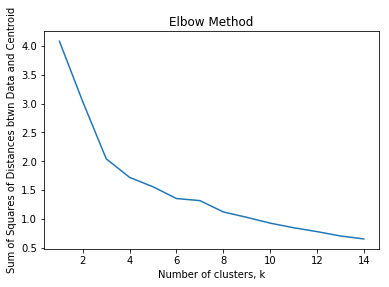

In [148]:
sum_of_squares = []
#fit a k-means model for k values between 1 and 15
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sum_of_squares.append(kmeans.inertia_)


plt.plot(range(1, 15), sum_of_squares)
plt.title('Elbow Method')
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of Squares of Distances btwn Data and Centroid')
plt.show()

Selecting the K value. It seems like K=7 is a good candidate. 

In [149]:
k = 7 
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)

In [150]:
venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

venues_sorted.head()

,Cluster Label,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Café,Bakery,Cheese Shop,Restaurant,Beer Bar,Pub,Portuguese Restaurant
1,5,"Brockton , Parkdale Village , Exhibition Place",Café,Breakfast Spot,Coffee Shop,Nightclub,Burrito Place,Restaurant,Italian Restaurant,Intersection,Stadium,Bar
2,5,Business reply mail Processing CentrE,Yoga Studio,Auto Workshop,Light Rail Station,Skate Park,Smoke Shop,Burrito Place,Farmers Market,Spa,Fast Food Restaurant,Restaurant
3,5,"CN Tower , King and Spadina , Railway Lands , ...",Airport Service,Airport Lounge,Airport Terminal,Airport,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Boat or Ferry,Bar
4,5,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Salad Place,Fried Chicken Joint,Bubble Tea Shop,Burger Joint,Ice Cream Shop,Bar


Let us create a dataframe corresponding to the sorted venues

In [151]:
to_clusters_df = to_df.join(venues_sorted.set_index('Neighborhood'), on='Neighborhood')

to_clusters_df.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant
41,M4K,East Toronto,"The Danforth West , Riverdale",43.679557,-79.352188,5,Greek Restaurant,Coffee Shop,Italian Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Bookstore,Ice Cream Shop,Pub,Pizza Place,Lounge
42,M4L,East Toronto,"India Bazaar , The Beaches West",43.668999,-79.315572,5,Sandwich Place,Fast Food Restaurant,Pet Store,Food & Drink Shop,Burrito Place,Restaurant,Italian Restaurant,Fish & Chips Shop,Ice Cream Shop,Steakhouse
43,M4M,East Toronto,Studio District,43.659526,-79.340923,5,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Sandwich Place,Cheese Shop
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,6,Park,Construction & Landscaping,Bus Line,Swim School,Yoga Studio,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


In [164]:
#import color packages
import matplotlib.cm as cm
import matplotlib.colors as colors

to_cluster_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters, using code from IBM's Data Science Course
n = np.arange(k)
clr = [i + n + (i*n)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(clr)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neigh, cluster in zip(to_clusters_df['Latitude'], to_clusters_df['Longitude'], to_clusters_df['Neighborhood'], to_clusters_df['Cluster Label']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(to_cluster_map)

to_cluster_map #show the resulting map

In [156]:
to_clusters_df[to_clusters_df["Cluster Label"]==0]

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant
49,M4V,Central Toronto,"Summerhill West , Rathnelly , South Hill , For...",43.686412,-79.400049,0,Coffee Shop,Pub,Health & Beauty Service,Light Rail Station,Liquor Store,Restaurant,Sports Bar,Bank,Bagel Shop,Supermarket
53,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,0,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Café,Theater,Yoga Studio,Mexican Restaurant,Shoe Store
85,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Diner,Mexican Restaurant,Burger Joint,Bank,Bar,Discount Store,Yoga Studio,Fried Chicken Joint


In [157]:

to_clusters_df[to_clusters_df["Cluster Label"]==1]

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,1,Park,Playground,Trail,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [158]:
to_clusters_df[to_clusters_df["Cluster Label"]==2]

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,M5N,Central Toronto,Roselawn,43.711695,-79.416936,2,Garden,Yoga Studio,Department Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [161]:

to_clusters_df[to_clusters_df["Cluster Label"]==3]


,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,M4T,Central Toronto,"Moore Park , Summerhill East",43.689574,-79.38316,3,Park,Yoga Studio,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [160]:

to_clusters_df[to_clusters_df["Cluster Label"]==4]

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197,4,Department Store,Sandwich Place,Park,Gym,Breakfast Spot,Hotel,Dog Run,Food & Drink Shop,Discount Store,Distribution Center


In [162]:

to_clusters_df[to_clusters_df["Cluster Label"]==5]

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,M4K,East Toronto,"The Danforth West , Riverdale",43.679557,-79.352188,5,Greek Restaurant,Coffee Shop,Italian Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Bookstore,Ice Cream Shop,Pub,Pizza Place,Lounge
42,M4L,East Toronto,"India Bazaar , The Beaches West",43.668999,-79.315572,5,Sandwich Place,Fast Food Restaurant,Pet Store,Food & Drink Shop,Burrito Place,Restaurant,Italian Restaurant,Fish & Chips Shop,Ice Cream Shop,Steakhouse
43,M4M,East Toronto,Studio District,43.659526,-79.340923,5,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Sandwich Place,Cheese Shop
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,5,Clothing Store,Coffee Shop,Furniture / Home Store,Restaurant,Dessert Shop,Sporting Goods Shop,Mexican Restaurant,Chinese Restaurant,Spa,Fast Food Restaurant
47,M4S,Central Toronto,Davisville,43.704324,-79.388790,5,Sandwich Place,Pizza Place,Dessert Shop,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Gym,Indian Restaurant,Japanese Restaurant
51,M4X,Downtown Toronto,"St. James Town , Cabbagetown",43.667967,-79.367675,5,Coffee Shop,Italian Restaurant,Restaurant,Café,Pub,Bakery,Pizza Place,Park,Japanese Restaurant,Jewelry Store
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,5,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Yoga Studio,Gastropub,Gay Bar,Hotel,Mediterranean Restaurant,Men's Store
54,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,5,Clothing Store,Coffee Shop,Café,Restaurant,Bubble Tea Shop,Italian Restaurant,Japanese Restaurant,Cosmetics Shop,Middle Eastern Restaurant,Hotel
55,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,5,Coffee Shop,Café,Gastropub,American Restaurant,Cocktail Bar,Cosmetics Shop,Department Store,Lingerie Store,Moroccan Restaurant,Italian Restaurant
56,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,5,Coffee Shop,Cocktail Bar,Seafood Restaurant,Café,Bakery,Cheese Shop,Restaurant,Beer Bar,Pub,Portuguese Restaurant


In [112]:

to_clusters_df[to_clusters_df["Cluster Label"]==6]

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,6,Park,Construction & Landscaping,Bus Line,Swim School,Yoga Studio,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
64,M5P,Central Toronto,Forest Hill North & West,43.696948,-79.411307,6,Park,Jewelry Store,Trail,Bus Line,Sushi Restaurant,Yoga Studio,Dessert Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


Thank you for following my analysis!